## Depth integrated tracer on shelf per km along shelf

In [1]:
#import gsw as sw # Gibbs seawater package

from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

#from MITgcmutils import rdmds

from netCDF4 import Dataset

import numpy as np

import os 

import pandas as pd

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys

In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
#lib_path = os.path.abspath('../BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts

sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 
import MetricsPythonTools as mpt


In [3]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [4]:
# plotting functions
def plotCanyonPos(ax,UpX,DnX):
    ax.axvline(UpX,color='0.70',linestyle='--')
    ax.axvline(DnX,color='0.70',linestyle='--')


In [5]:
#Exp
CGrid = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc' 
CGridOut = Dataset(CGrid)

CGridNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc' 
CGridNoCOut = Dataset(CGridNoC)

Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/ptracersGlob.nc' 
PtracersOut = Dataset(Ptracers)
Ptracers11 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run11/ptracersGlob.nc' 
Ptracers12 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12/ptracersGlob.nc' 
Ptracers17 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run17/ptracersGlob.nc' 

Ptracers14 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run14/ptracersGlob.nc' 
Ptracers15 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run15/ptracersGlob.nc' 
Ptracers16 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run16/ptracersGlob.nc' 

Ptracers18 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run18/ptracersGlob.nc' 
Ptracers19 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run19/ptracersGlob.nc' 

Ptracers29 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run29/ptracersGlob.nc' 

Ptracers043D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/ptracersGlob.nc' 
Ptracers053D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05/ptracersGlob.nc' 
Ptracers063D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/ptracersGlob.nc' 
Ptracers073D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07/ptracersGlob.nc' 

PtracersNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/ptracersGlob.nc' 
PtracersOutNoC = Dataset(PtracersNoC)

State = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc' 
StateNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/stateGlob.nc' 




In [6]:
State11 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run11/stateGlob.nc' 
State12 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12/stateGlob.nc' 
State17 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run17/stateGlob.nc' 

State14 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run14/stateGlob.nc' 
State15 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run15/stateGlob.nc' 
State16 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run16/stateGlob.nc' 

State18 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run18/stateGlob.nc' 
State19 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run19/stateGlob.nc' 

State29 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run29/stateGlob.nc' 

State043D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/stateGlob.nc' 
State053D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05/stateGlob.nc' 
State063D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/stateGlob.nc' 
State073D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07/stateGlob.nc' 

In [7]:
# General input

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 
numTr = 22 # number of tracers in total (CNT =22, 3D = 4, total = 19)

rc = CGridNoCOut.variables['RC']
dxf = CGridNoCOut.variables['dxF']
xc = rout.getField(CGridNoC, 'XC') # x coords tracer cells
yc = rout.getField(CGridNoC, 'YC') # y coords tracer cells

rA = rout.getField(CGridNoC, 'rA') 

drF = CGridNoCOut.variables['drF'] # vertical distance between faces
drC = CGridNoCOut.variables['drC'] # vertical distance between centers

hFacC = rout.getField(CGridNoC, 'HFacC')
mask_NoC = rout.getMask(CGridNoC, 'HFacC')

labels = ['Kv: out=1E-7, in=1E-3, Kiso=1','Kv: out=1E-7,in=1E-4, Kiso=1','Kv: out=1E-5, in=1E-3, Kiso=1',
          'Kv: out=1E-5, in=1E-4, Kiso=1','Kv=1E-5, Kiso=1','Kv=1E-4, Kiso=1','Kv=1E-3, Kiso=1','Kv=3.8E-5, Kiso=10',
          'Kv=2.8E-5, Kiso=10','Kv=1.3E-5, Kiso=10','Kv_noc=1E-5, Kiso=1','Kv_noc=1E-4, Kiso=1','Kv_noc=1E-3, Kiso=1',
          'Kv=1E-5, Kiso=10','Kv=1E-4, Kiso=10','Kv=1E-3, Kiso=10','Kv=1E-5, Kiso=0.1','Kv=1E-4, Kiso=0.1','Kv=1E-3, Kiso=0.1',
          'Kv=3.8E-5, Kiso=1','Kv=2.8E-5, Kiso=1','Kv=1.3E-5, Kiso=1']

times = np.arange(0,nt,1)

#print(drC[:])
#print(np.shape(drC))

In [8]:
def HCW_Tracer_AlongShelf(Tr,MaskC,nzlim,rA,hFacC,drF,yin,zfin,xi,yi):
  '''
  INPUT----------------------------------------------------------------------------------------------------------------
    Tr    : Array with concentration values for a tracer. Until this function is more general, this should be size 19x90x360x360
    MaskC : Land mask for tracer
    nzlim : The nz index under which to look for water properties
    rA    : Area of cell faces at C points (360x360)
    fFacC : Fraction of open cell (90x360x360)
    drF   : Distance between cell faces (90)
    yin   : across-shore index of shelf break
    zfin  : shelf break index + 1 
    xi    : initial profile x index
    yi    : initial profile y index
    
    OUTPUT----------------------------------------------------------------------------------------------------------------
    VolWaterHighConc =  Array with the volume of water over the shelf [t,360] at every time output.
    Total_Tracer =  Array with the mass of tracer (m^3*[C]*l/m^3) at each x-position over the shelf [t,360] at 
                    every time output. 
                                                
  -----------------------------------------------------------------------------------------------------------------------
  '''
  maskExp = mpt.maskExpand(MaskC,Tr)

  TrMask=np.ma.array(Tr,mask=maskExp)   
    
  trlim = TrMask[0,nzlim,yi,xi]
    
  print('tracer limit concentration is: ',trlim)
    
    
  # mask cells with tracer concentration < trlim on shelf
  HighConc_Masked = np.ma.masked_less(TrMask[:,:zfin,yin:,:], trlim) 
  HighConc_Mask = HighConc_Masked.mask
    
  #Get volume of water of cells with relatively high concentration
  rA_exp = np.expand_dims(rA[yin:,:],0)
  drF_exp = np.expand_dims(np.expand_dims(drF[:zfin],1),1)
  rA_exp = rA_exp + np.zeros(hFacC[:zfin,yin:,:].shape)
  drF_exp = drF_exp + np.zeros(hFacC[:zfin,yin:,:].shape)
    
  ShelfVolume = hFacC[:zfin,yin:,:]*drF_exp*rA_exp
  ShelfVolume_exp = np.expand_dims(ShelfVolume,0)
  ShelfVolume_exp = ShelfVolume_exp + np.zeros(HighConc_Mask.shape)
    
  HighConc_CellVol = np.ma.masked_array(ShelfVolume_exp,mask = HighConc_Mask) 
  VolWaterHighConc =np.ma.sum(np.ma.sum(HighConc_CellVol,axis = 1),axis=1)
    
   #Get total mass of tracer on shelf
  Total_Tracer = np.ma.sum(np.ma.sum(ShelfVolume_exp*TrMask[:,:zfin,yin:,:]*1000.0,axis = 1),axis=1)
   # 1 m^3 = 1000 l
    
  return (VolWaterHighConc, Total_Tracer)

In [9]:
Tr1 = rout.getField(Ptracers, 'Tr1')
S = rout.getField(State, 'S')
Tr1NoC = rout.getField(PtracersNoC, 'Tr1')
SNoC = rout.getField(StateNoC, 'S')

6.49791
2.17992
4.60879


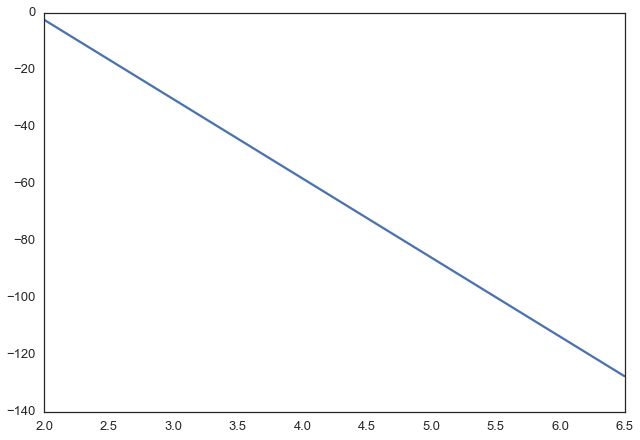

In [10]:
plt.plot(Tr1[0,:26,245,240],rc[:26])
print(Tr1[0,25,245,240])
print(Tr1[0,1,245,240])
print(np.nanmean(Tr1[0,:30,227,:]))


## 20 day run

In [11]:
#Tra = rout.getField(Ptracers29, 'Tr1')

In [12]:
#print(np.shape(Tra))

In [13]:
#HCW29,TrMass29 = HCW_Tracer_AlongShelf(Tra,mask_NoC,30,rA,hFacC,drF,227,30,180,50)


#fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15),(ax16,ax17,ax18)) = plt.subplots(6,3, figsize = (14,20),sharex=True, sharey=True)

#axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18]

#times = np.arange(4,73,4)
#for ii,ax in zip(times,axlist):
    
#    ax.plot(xc[1,:]/1000,(HCW29[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base case')
#    #ax.plot(xc[1,:]/1000,HCWNoC[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
#    ax.axhline(0,color='0.3')
 #   ax.set_title('day %d' %(ii/4.))
 #   plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

#ax1.legend(loc=0)
#ax17.set_xlabel('Alongshore distance (km)')
#ax7.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')

 

In [14]:
#fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15),(ax16,ax17,ax18)) = plt.subplots(6,3, figsize = (14,20),sharex=True, sharey=True)

#axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18]

#times = np.arange(4,73,4)
#for ii,ax in zip(times,axlist):
    
#    ax.plot(xc[1,:]/1000,(TrMass29[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base case')
    #ax.plot(xc[1,:]/1000,HCWNoC[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    #ax.axhline(0,color='0.3')
#    ax.set_title('day %d' %(ii/4.))
#    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)



#ax1.legend(loc=0)
#ax17.set_xlabel('Alongshore distance (km)')
#ax7.set_ylabel('Tracer mass per m ($10^6$ $[C]m^3$)')

#plt.tight_layout()    



## Changing Diffusivity

In [15]:
HCW,TrMass = HCW_Tracer_AlongShelf(Tr1,mask_NoC,30,rA,hFacC,drF,227,30,180,50)
HCWNoC,TrMassNoC = HCW_Tracer_AlongShelf(Tr1NoC,mask_NoC,30,rA,hFacC,drF,227,30,180,50)

HSW,SMass = HCW_Tracer_AlongShelf(S,mask_NoC,30,rA,hFacC,drF,227,30,180,50)
HSWNoC,SMassNoC = HCW_Tracer_AlongShelf(SNoC,mask_NoC,30,rA,hFacC,drF,227,30,180,50)


('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 32.251045)
('tracer limit concentration is: ', 32.251045)


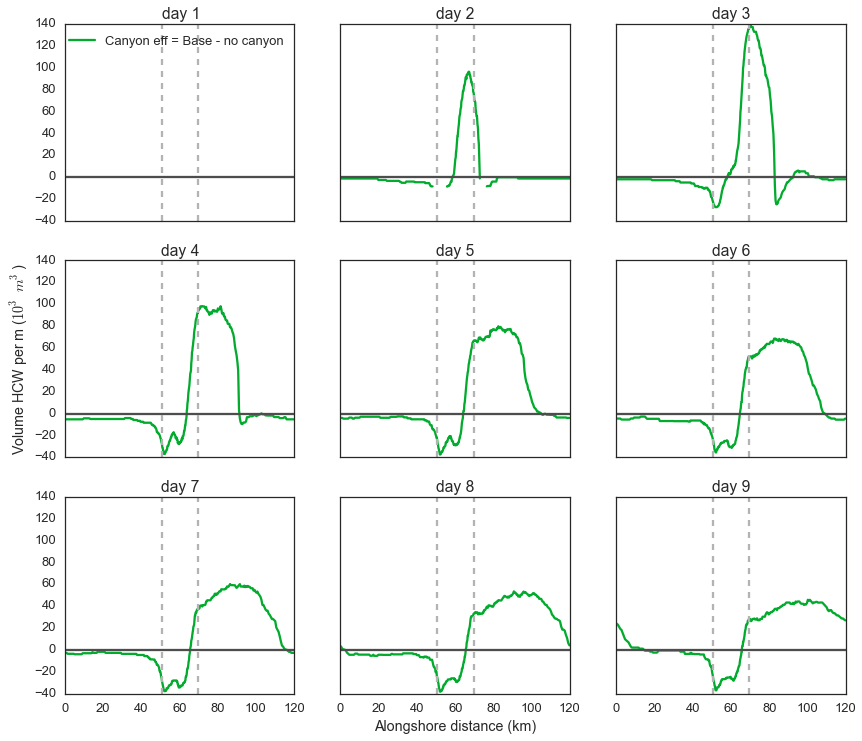

In [16]:
   

fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    
    ax.plot(xc[1,:]/1000,(HCW[ii,:]-HCWNoC[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Canyon eff = Base - no canyon')
    #ax.plot(xc[1,:]/1000,HCWNoC[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.axhline(0,color='0.3')
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')

    


In [17]:
Tra = rout.getField(Ptracers11, 'Tr2')
Trb = rout.getField(Ptracers12, 'Tr3')
Trc = rout.getField(Ptracers17, 'Tr3')


In [18]:
HCW11,TrMass11 = HCW_Tracer_AlongShelf(Tra,mask_NoC,30,rA,hFacC,drF,227,30,180,50)
HCW12,TrMass12 = HCW_Tracer_AlongShelf(Trb,mask_NoC,30,rA,hFacC,drF,227,30,180,50)
HCW17,TrMass17 = HCW_Tracer_AlongShelf(Trc,mask_NoC,30,rA,hFacC,drF,227,30,180,50)

('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)


In [19]:
Tra = rout.getField(State11, 'S')
Trb = rout.getField(State12, 'S')
Trc = rout.getField(State17, 'S')
HSW11,SMass11 = HCW_Tracer_AlongShelf(Tra,mask_NoC,30,rA,hFacC,drF,227,30,180,50)
HSW12,SMass12 = HCW_Tracer_AlongShelf(Trb,mask_NoC,30,rA,hFacC,drF,227,30,180,50)
HSW17,SMass17 = HCW_Tracer_AlongShelf(Trc,mask_NoC,30,rA,hFacC,drF,227,30,180,50)

('tracer limit concentration is: ', 32.251045)
('tracer limit concentration is: ', 32.251045)
('tracer limit concentration is: ', 32.251045)


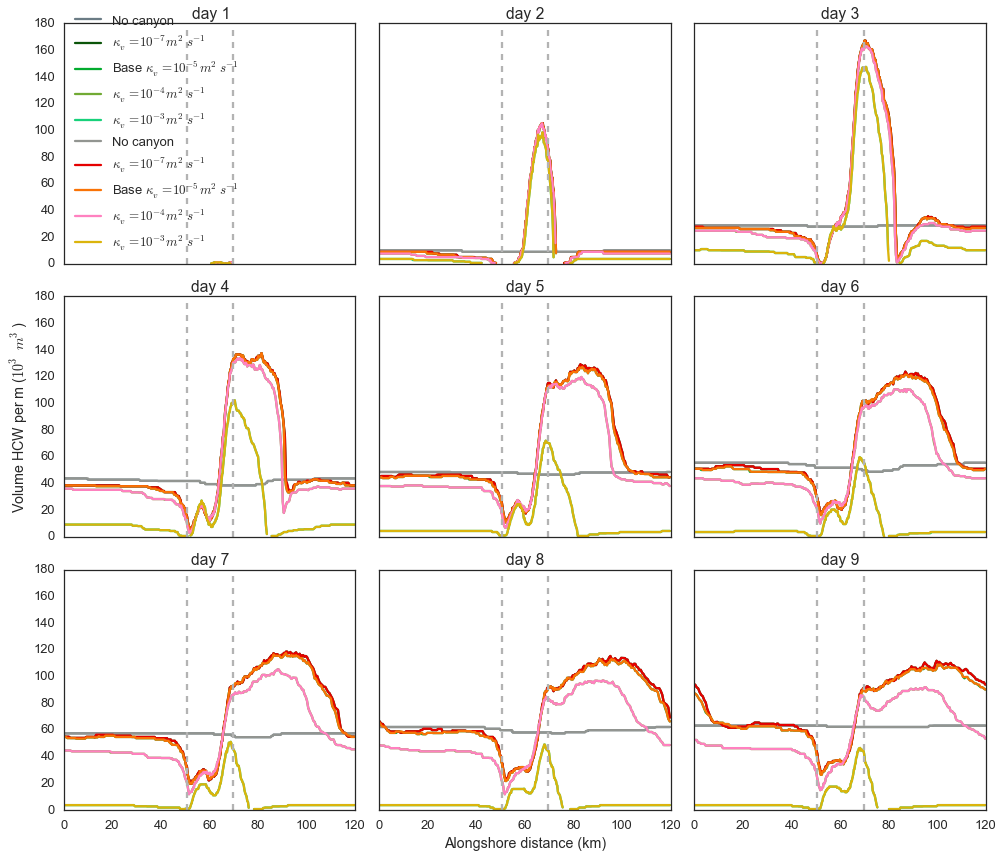

In [20]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    ax.plot(xc[1,:]/1000,HCWNoC[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,HCW17[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["forest"],label='$\kappa_v=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW11[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["leaf"],label='$\kappa_v=10^{-4}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW12[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["seaweed"],label='$\kappa_v=10^{-3}m^2s^{-1}$')
    
    ax.plot(xc[1,:]/1000,HSWNoC[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,HSW17[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["red"],label='$\kappa_v=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,HSW[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["orange"],label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,HSW11[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["pink"],label='$\kappa_v=10^{-4}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,HSW12[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["gold"],label='$\kappa_v=10^{-3}m^2s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')

    
plt.tight_layout()

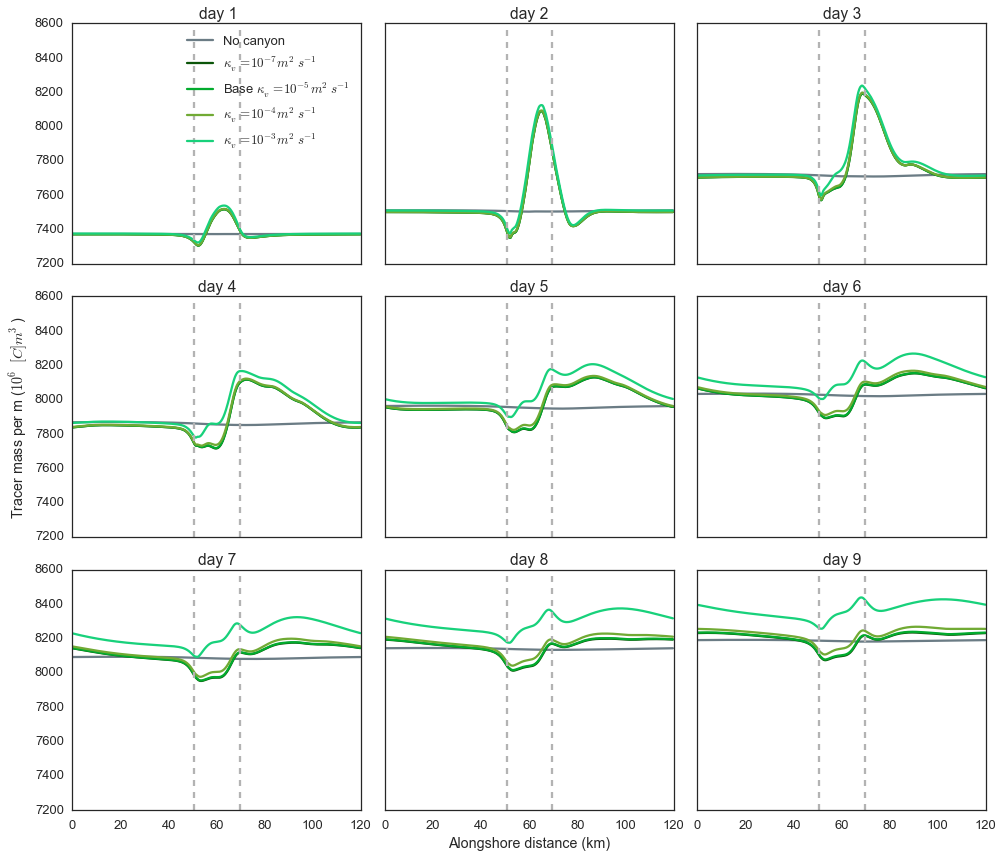

In [21]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    ax.plot(xc[1,:]/1000,TrMassNoC[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,TrMass17[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["forest"],label='$\kappa_v=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass11[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["leaf"],label='$\kappa_v=10^{-4}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass12[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["seaweed"],label='$\kappa_v=10^{-3}m^2s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Tracer mass per m ($10^6$ $[C]m^3$)')

plt.tight_layout()    


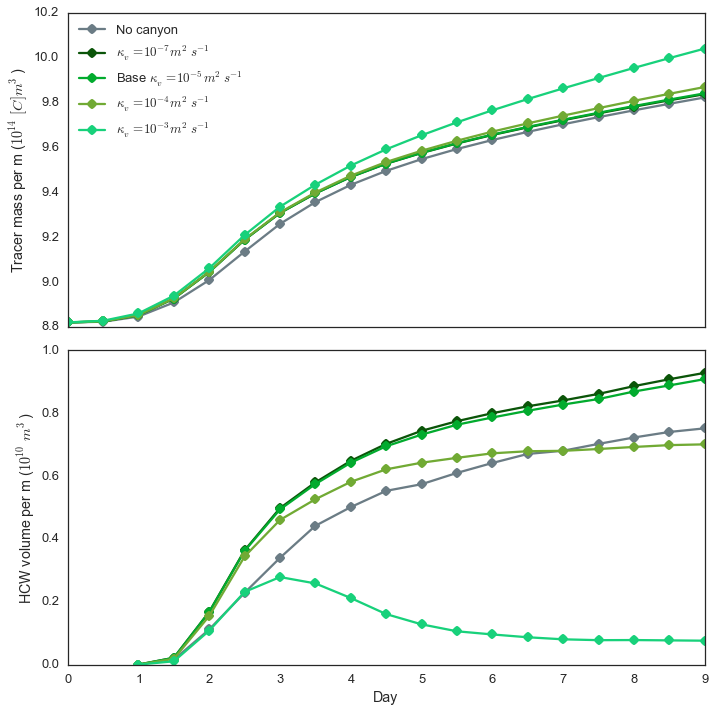

change in HCW from day 5 to day 9 over 4 days ($m^3/s$)
NoC 5.143802e+03
base 5.110141e+03
run11 1.690406e+03
run12 -1.506834e+03
run17 5.336853e+03
change in Tr mass from day 5 to day 9 over 4 days ($m^3/s$)
NoC 7.951074e+07
base 7.654901e+07
run11 8.216564e+07
run12 1.117210e+08
run17 7.582174e+07


In [22]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)

ax1.plot(tt/2.,np.sum(TrMassNoC,axis=1)/1.E14,sns.xkcd_rgb["battleship grey"],marker = 'o',label='No canyon')
ax1.plot(tt/2.,np.sum(TrMass17,axis=1)/1.E14,sns.xkcd_rgb["forest"],marker = 'o',label='$\kappa_v=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass,axis=1)/1.E14,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass11,axis=1)/1.E14,sns.xkcd_rgb["leaf"],marker = 'o',label='$\kappa_v=10^{-4}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass12,axis=1)/1.E14,sns.xkcd_rgb["seaweed"],marker = 'o',label='$\kappa_v=10^{-3}m^2s^{-1}$')
   
ax2.plot(tt/2.,np.sum(HCWNoC,axis=1)/1.E10,sns.xkcd_rgb["battleship grey"],marker = 'o',label='No canyon')
ax2.plot(tt/2.,np.sum(HCW17,axis=1)/1.E10,sns.xkcd_rgb["forest"],marker = 'o',label='$\kappa_v=10^{-7}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW11,axis=1)/1.E10,sns.xkcd_rgb["leaf"],marker = 'o',label='$\kappa_v=10^{-4}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW12,axis=1)/1.E10,sns.xkcd_rgb["seaweed"],marker = 'o',label='$\kappa_v=10^{-3}m^2s^{-1}$')
  
    
ax1.legend(loc=0)
ax2.set_xlabel('Day')
ax1.set_ylabel('Tracer mass per m ($10^{14}$ $[C]m^3$)')
ax2.set_ylabel('HCW volume per m ($10^{10}$ $m^3$)')
plt.tight_layout()

plt.show()

print('change in HCW from day 5 to day 9 over 4 days ($m^3/s$)')
print('NoC %e' %((np.sum(HCWNoC,axis=1)[18]-np.sum(HCWNoC,axis=1)[10])/(4*3600.0*24)))
print('base %e' %((np.sum(HCW,axis=1)[18]-np.sum(HCW,axis=1)[10])/(4*3600.0*24)))
print('run11 %e' %((np.sum(HCW11,axis=1)[18]-np.sum(HCW11,axis=1)[10])/(4*3600.0*24)))
print('run12 %e' %((np.sum(HCW12,axis=1)[18]-np.sum(HCW12,axis=1)[10])/(4*3600.0*24)))
print('run17 %e' %((np.sum(HCW17,axis=1)[18]-np.sum(HCW17,axis=1)[10])/(4*3600.0*24)))

print('change in Tr mass from day 5 to day 9 over 4 days ($m^3/s$)')
print('NoC %e' %((np.sum(TrMassNoC,axis=1)[18]-np.sum(TrMassNoC,axis=1)[10])/(4*3600.0*24)))
print('base %e' %((np.sum(TrMass,axis=1)[18]-np.sum(TrMass,axis=1)[10])/(4*3600.0*24)))
print('run11 %e' %((np.sum(TrMass11,axis=1)[18]-np.sum(TrMass11,axis=1)[10])/(4*3600.0*24)))
print('run12 %e' %((np.sum(TrMass12,axis=1)[18]-np.sum(TrMass12,axis=1)[10])/(4*3600.0*24)))
print('run17 %e' %((np.sum(TrMass17,axis=1)[18]-np.sum(TrMass17,axis=1)[10])/(4*3600.0*24)))


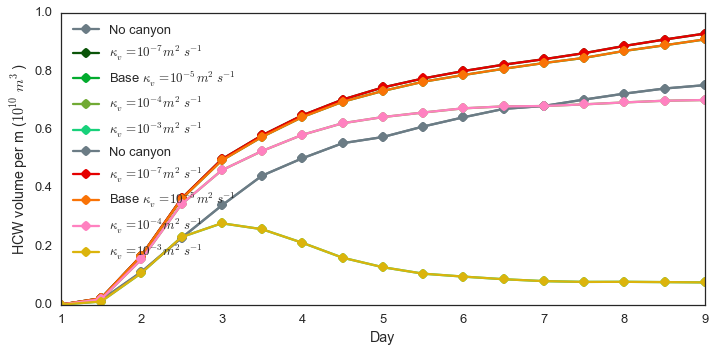

203420100.56292343

In [23]:
fig,(ax1) = plt.subplots(1,1, figsize = (10,5))

tt = np.arange(19)

ax1.plot(tt/2.,np.sum(HCWNoC,axis=1)/1.E10,sns.xkcd_rgb["battleship grey"],marker = 'o',label='No canyon')
ax1.plot(tt/2.,np.sum(HCW17,axis=1)/1.E10,sns.xkcd_rgb["forest"],marker = 'o',label='$\kappa_v=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(HCW,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(HCW11,axis=1)/1.E10,sns.xkcd_rgb["leaf"],marker = 'o',label='$\kappa_v=10^{-4}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(HCW12,axis=1)/1.E10,sns.xkcd_rgb["seaweed"],marker = 'o',label='$\kappa_v=10^{-3}m^2s^{-1}$')
   
ax1.plot(tt/2.,np.sum(HSWNoC,axis=1)/1.E10,sns.xkcd_rgb["battleship grey"],marker = 'o',label='No canyon')
ax1.plot(tt/2.,np.sum(HSW17,axis=1)/1.E10,sns.xkcd_rgb["red"],marker = 'o',label='$\kappa_v=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(HSW,axis=1)/1.E10,sns.xkcd_rgb["orange"],marker = 'o',label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(HSW11,axis=1)/1.E10,sns.xkcd_rgb["pink"],marker = 'o',label='$\kappa_v=10^{-4}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(HSW12,axis=1)/1.E10,sns.xkcd_rgb["gold"],marker = 'o',label='$\kappa_v=10^{-3}m^2s^{-1}$')
  
    
ax1.legend(loc=0)
ax1.set_xlabel('Day')
ax1.set_ylabel('HCW volume per m ($10^{10}$ $m^3$)')
plt.tight_layout()

plt.show()


np.sum(HSW17,axis=1)[18]-np.sum(HSW17,axis=1)[17]


This plots show that there is no difference in using Tr concentration or Salinity to calculate HCW volume

## Changing geography of diapycnal diffusivity 

In [24]:
Tra = rout.getField(Ptracers043D, 'Tr1')
Trb = rout.getField(Ptracers053D, 'Tr1')
Trc = rout.getField(Ptracers063D, 'Tr1')
Trd = rout.getField(Ptracers073D, 'Tr1')

In [25]:
HCW043D,TrMass043D = HCW_Tracer_AlongShelf(Tra,mask_NoC,30,rA,hFacC,drF,227,30,180,50)
HCW053D,TrMass053D = HCW_Tracer_AlongShelf(Trb,mask_NoC,30,rA,hFacC,drF,227,30,180,50)
HCW063D,TrMass063D = HCW_Tracer_AlongShelf(Trc,mask_NoC,30,rA,hFacC,drF,227,30,180,50)
HCW073D,TrMass073D = HCW_Tracer_AlongShelf(Trd,mask_NoC,30,rA,hFacC,drF,227,30,180,50)

('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)


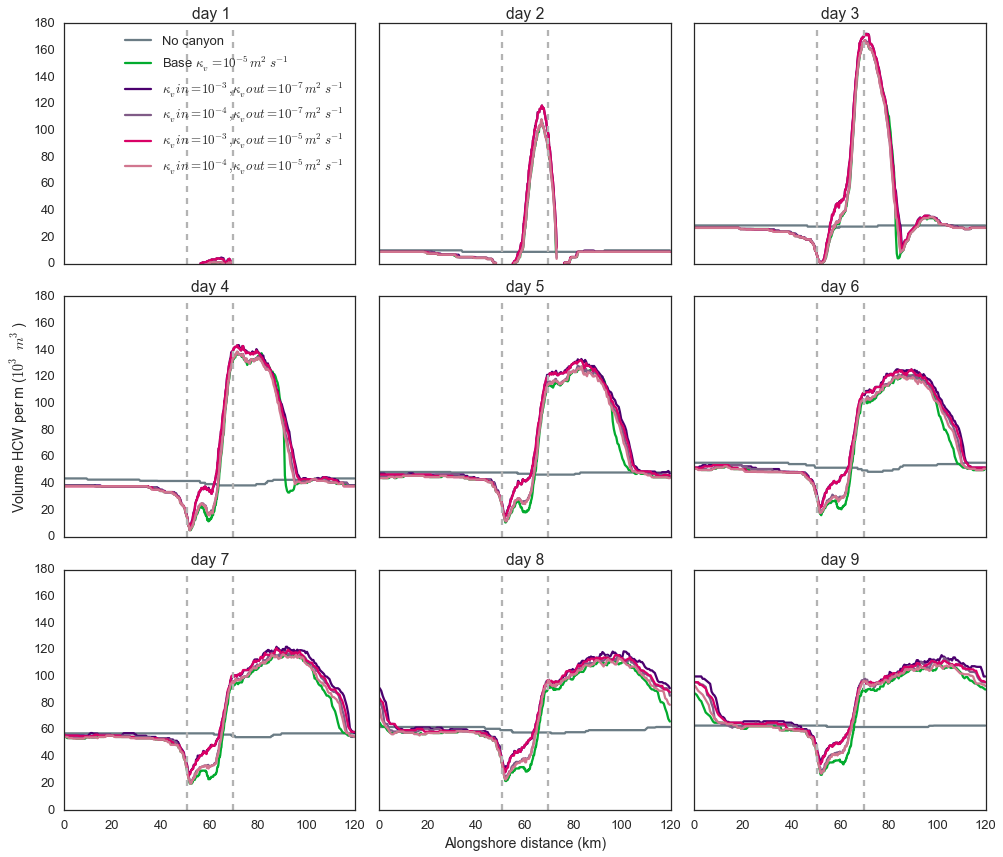

In [26]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    ax.plot(xc[1,:]/1000,HCWNoC[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,HCW[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW043D[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["royal purple"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW053D[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["muted purple"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW063D[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["dark hot pink"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW073D[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["muted pink"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')

plt.tight_layout()    


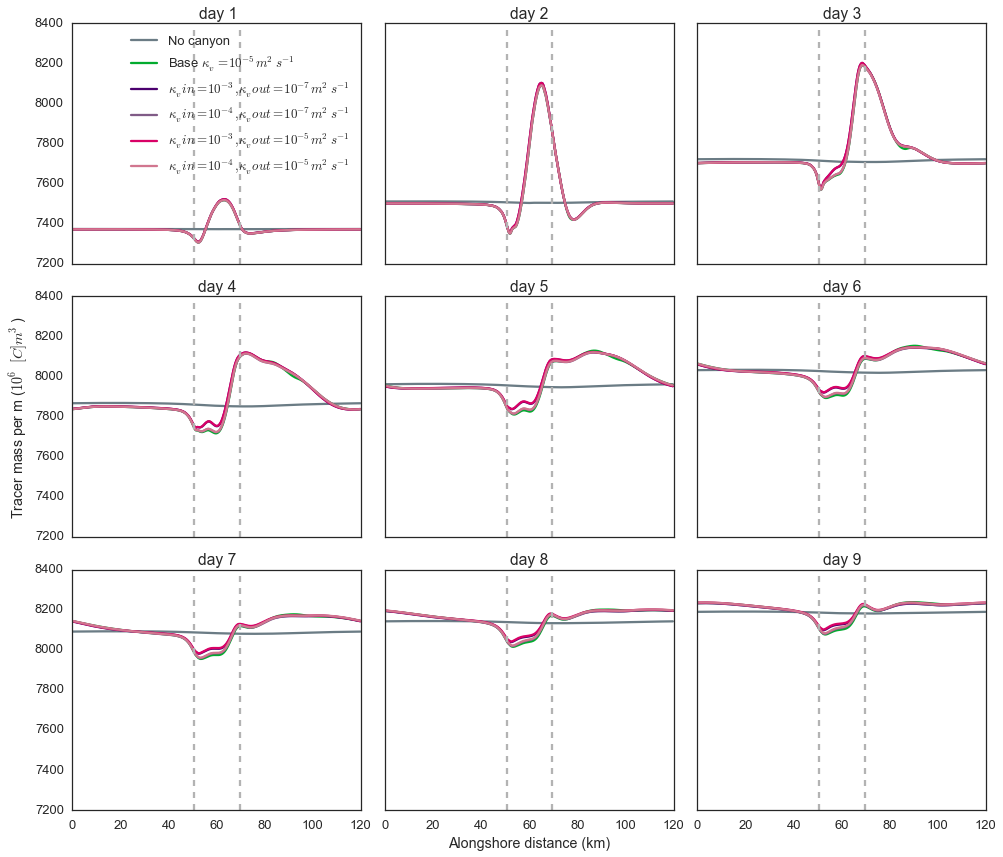

In [27]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    ax.plot(xc[1,:]/1000,TrMassNoC[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,TrMass[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass043D[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["royal purple"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass053D[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["muted purple"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass063D[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["dark hot pink"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass073D[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["muted pink"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Tracer mass per m ($10^6$ $[C]m^3$)')

    
plt.tight_layout()

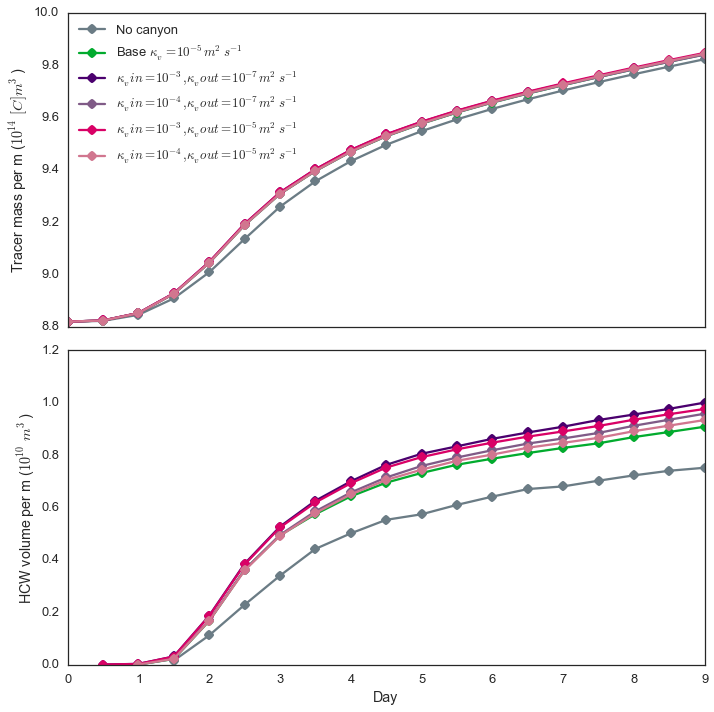

change in HCW from day 5 to day 9 over 4 days ($m^3/s$)
NoC 5.143802e+03
base 5.110141e+03
run04 3D 5.652284e+03
run05 3D 5.775934e+03
run06 3D 5.322137e+03
run07 3D 5.485329e+03
change in Tr mass from day 5 to day 9 over 4 days ($m^3/s$)
NoC 7.951074e+07
base 7.654901e+07
run04 3D 7.525315e+07
run05 3D 7.617171e+07
run06 3D 7.604840e+07
run07 3D 7.687417e+07


In [28]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)

ax1.plot(tt/2.,np.sum(TrMassNoC,axis=1)/1.E14,sns.xkcd_rgb["battleship grey"],marker = 'o',label='No canyon')
ax1.plot(tt/2.,np.sum(TrMass,axis=1)/1.E14,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass043D,axis=1)/1.E14,sns.xkcd_rgb["royal purple"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass053D,axis=1)/1.E14,sns.xkcd_rgb["muted purple"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass063D,axis=1)/1.E14,sns.xkcd_rgb["dark hot pink"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass073D,axis=1)/1.E14,sns.xkcd_rgb["muted pink"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
   
ax2.plot(tt/2.,np.sum(HCWNoC,axis=1)/1.E10,sns.xkcd_rgb["battleship grey"],marker = 'o',label='No canyon')
ax2.plot(tt/2.,np.sum(HCW,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $\kappa_v=10^{-5}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW043D,axis=1)/1.E10,sns.xkcd_rgb["royal purple"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW053D,axis=1)/1.E10,sns.xkcd_rgb["muted purple"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW063D,axis=1)/1.E10,sns.xkcd_rgb["dark hot pink"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW073D,axis=1)/1.E10,sns.xkcd_rgb["muted pink"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
  
    
ax1.legend(loc=0)
ax2.set_xlabel('Day')
ax1.set_ylabel('Tracer mass per m ($10^{14}$ $[C]m^3$)')
ax2.set_ylabel('HCW volume per m ($10^{10}$ $m^3$)')
plt.tight_layout()

plt.show()

print('change in HCW from day 5 to day 9 over 4 days ($m^3/s$)')
print('NoC %e' %((np.sum(HCWNoC,axis=1)[18]-np.sum(HCWNoC,axis=1)[10])/(4*3600.0*24)))
print('base %e' %((np.sum(HCW,axis=1)[18]-np.sum(HCW,axis=1)[10])/(4*3600.0*24)))
print('run04 3D %e' %((np.sum(HCW043D,axis=1)[18]-np.sum(HCW043D,axis=1)[10])/(4*3600.0*24)))
print('run05 3D %e' %((np.sum(HCW053D,axis=1)[18]-np.sum(HCW053D,axis=1)[10])/(4*3600.0*24)))
print('run06 3D %e' %((np.sum(HCW063D,axis=1)[18]-np.sum(HCW063D,axis=1)[10])/(4*3600.0*24)))
print('run07 3D %e' %((np.sum(HCW073D,axis=1)[18]-np.sum(HCW073D,axis=1)[10])/(4*3600.0*24)))

print('change in Tr mass from day 5 to day 9 over 4 days ($m^3/s$)')
print('NoC %e' %((np.sum(TrMassNoC,axis=1)[18]-np.sum(TrMassNoC,axis=1)[10])/(4*3600.0*24)))
print('base %e' %((np.sum(TrMass,axis=1)[18]-np.sum(TrMass,axis=1)[10])/(4*3600.0*24)))
print('run04 3D %e' %((np.sum(TrMass043D,axis=1)[18]-np.sum(TrMass043D,axis=1)[10])/(4*3600.0*24)))
print('run05 3D %e' %((np.sum(TrMass053D,axis=1)[18]-np.sum(TrMass053D,axis=1)[10])/(4*3600.0*24)))
print('run06 3D %e' %((np.sum(TrMass063D,axis=1)[18]-np.sum(TrMass063D,axis=1)[10])/(4*3600.0*24)))
print('run07 3D %e' %((np.sum(TrMass073D,axis=1)[18]-np.sum(TrMass073D,axis=1)[10])/(4*3600.0*24)))

## Changing initial stratification

In [29]:
Tra = rout.getField(Ptracers14, 'Tr1')
Trb = rout.getField(Ptracers15, 'Tr1')
Trc = rout.getField(Ptracers16, 'Tr1')


In [30]:
HCW14,TrMass14 = HCW_Tracer_AlongShelf(Tra,mask_NoC,30,rA,hFacC,drF,227,30,180,50)
HCW15,TrMass15 = HCW_Tracer_AlongShelf(Trb,mask_NoC,30,rA,hFacC,drF,227,30,180,50)
HCW16,TrMass16 = HCW_Tracer_AlongShelf(Trc,mask_NoC,30,rA,hFacC,drF,227,30,180,50)


('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)


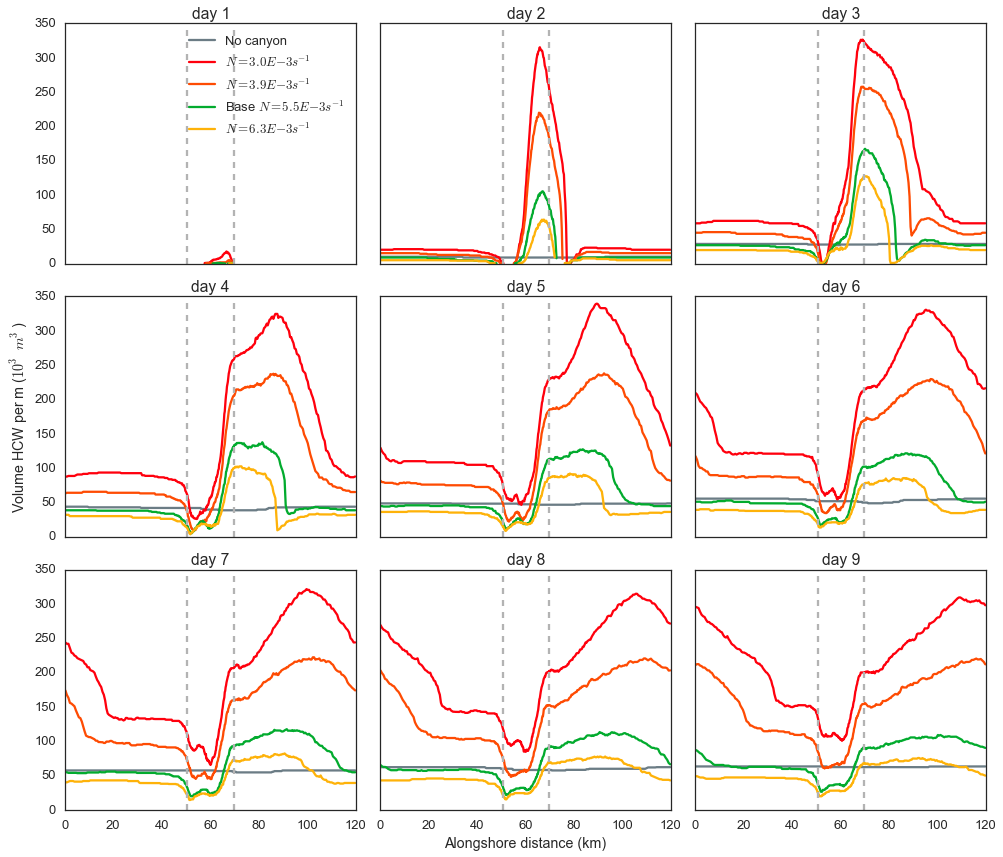

In [31]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    
    ax.plot(xc[1,:]/1000,HCWNoC[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,HCW16[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["bright red"],label='$N=3.0E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW14[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["blood orange"],label='$N=3.9E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $N=5.5E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW15[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["saffron"],label='$N=6.3E-3s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')
plt.tight_layout()


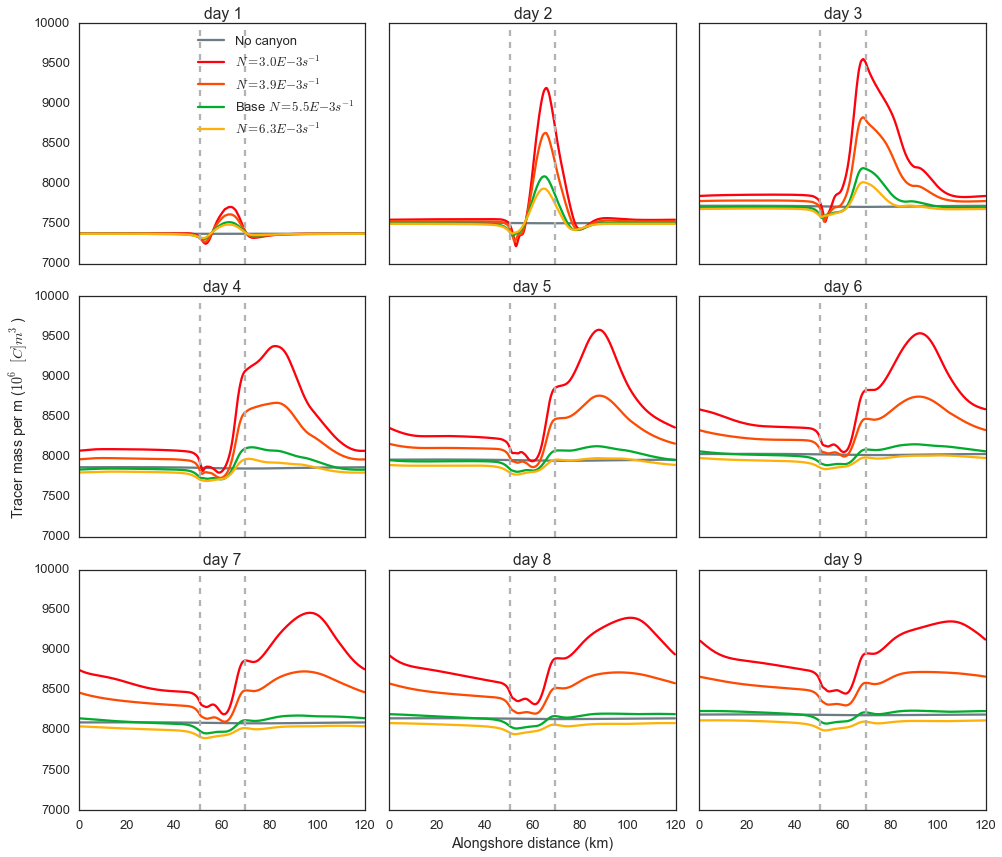

In [32]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (14,12),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    ax.plot(xc[1,:]/1000,TrMassNoC[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,TrMass16[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["bright red"],label='$N=3.0E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass14[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["blood orange"],label='$N=3.9E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $N=5.5E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass15[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["saffron"],label='$N=6.3E-3s^{-1}$')
   
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Tracer mass per m ($10^6$ $[C]m^3$)')

plt.tight_layout()

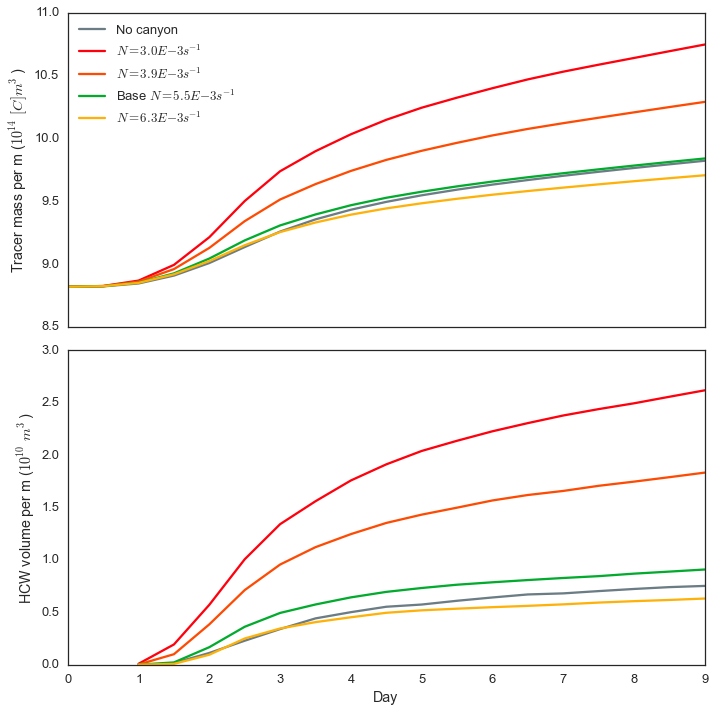

change in HCW from day 5 to day 9 over 4 days ($m^3/s$)
NoC 5.143802e+03
base 5.110141e+03
run16 1.675188e+04
run15 3.254818e+03
run14 1.160836e+04
change in Tr mass from day 5 to day 9 over 4 days ($m^3/s$)
NoC 7.951074e+07
base 7.654901e+07
run16 1.454441e+08
run15 6.446136e+07
run14 1.125764e+08


In [33]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)

ax1.plot(tt/2.,np.sum(TrMassNoC ,axis=1)/1.E14,sns.xkcd_rgb["battleship grey"],label='No canyon')
ax1.plot(tt/2.,np.sum(TrMass16 ,axis=1)/1.E14,sns.xkcd_rgb["bright red"],label='$N=3.0E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass14 ,axis=1)/1.E14,sns.xkcd_rgb["blood orange"],label='$N=3.9E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass ,axis=1)/1.E14,sns.xkcd_rgb["kelly green"],label='Base $N=5.5E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass15 ,axis=1)/1.E14,sns.xkcd_rgb["saffron"],label='$N=6.3E-3s^{-1}$')
   
ax2.plot(tt/2.,np.sum(HCWNoC ,axis=1)/1.E10,sns.xkcd_rgb["battleship grey"],label='No canyon')
ax2.plot(tt/2.,np.sum(HCW16 ,axis=1)/1.E10,sns.xkcd_rgb["bright red"],label='$N=3.0E-3s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW14 ,axis=1)/1.E10,sns.xkcd_rgb["blood orange"],label='$N=3.9E-3s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW ,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],label='Base $N=5.5E-3s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW15 ,axis=1)/1.E10,sns.xkcd_rgb["saffron"],label='$N=6.3E-3s^{-1}$')
     
    
ax1.legend(loc=0)
ax2.set_xlabel('Day')
ax1.set_ylabel('Tracer mass per m ($10^{14}$ $[C]m^3$)')
ax2.set_ylabel('HCW volume per m ($10^{10}$ $m^3$)')
plt.tight_layout()
plt.show()

print('change in HCW from day 5 to day 9 over 4 days ($m^3/s$)')
print('NoC %e' %((np.sum(HCWNoC,axis=1)[18]-np.sum(HCWNoC,axis=1)[10])/(4*3600.0*24)))
print('base %e' %((np.sum(HCW,axis=1)[18]-np.sum(HCW,axis=1)[10])/(4*3600.0*24)))
print('run16 %e' %((np.sum(HCW16,axis=1)[18]-np.sum(HCW16,axis=1)[10])/(4*3600.0*24)))
print('run15 %e' %((np.sum(HCW15,axis=1)[18]-np.sum(HCW15,axis=1)[10])/(4*3600.0*24)))
print('run14 %e' %((np.sum(HCW14,axis=1)[18]-np.sum(HCW14,axis=1)[10])/(4*3600.0*24)))

print('change in Tr mass from day 5 to day 9 over 4 days ($m^3/s$)')
print('NoC %e' %((np.sum(TrMassNoC,axis=1)[18]-np.sum(TrMassNoC,axis=1)[10])/(4*3600.0*24)))
print('base %e' %((np.sum(TrMass,axis=1)[18]-np.sum(TrMass,axis=1)[10])/(4*3600.0*24)))
print('run16 %e' %((np.sum(TrMass16,axis=1)[18]-np.sum(TrMass16,axis=1)[10])/(4*3600.0*24)))
print('run15 %e' %((np.sum(TrMass15,axis=1)[18]-np.sum(TrMass15,axis=1)[10])/(4*3600.0*24)))
print('run14 %e' %((np.sum(TrMass14,axis=1)[18]-np.sum(TrMass14,axis=1)[10])/(4*3600.0*24)))

## Changing latitude (f)

In [34]:
Tra = rout.getField(Ptracers18, 'Tr1')
Trb = rout.getField(Ptracers19, 'Tr1')

In [35]:
HCW18,TrMass18 = HCW_Tracer_AlongShelf(Tra,mask_NoC,30,rA,hFacC,drF,227,30,180,50)
HCW19,TrMass19 = HCW_Tracer_AlongShelf(Trb,mask_NoC,30,rA,hFacC,drF,227,30,180,50)


('tracer limit concentration is: ', 7.3974895)
('tracer limit concentration is: ', 7.3974895)


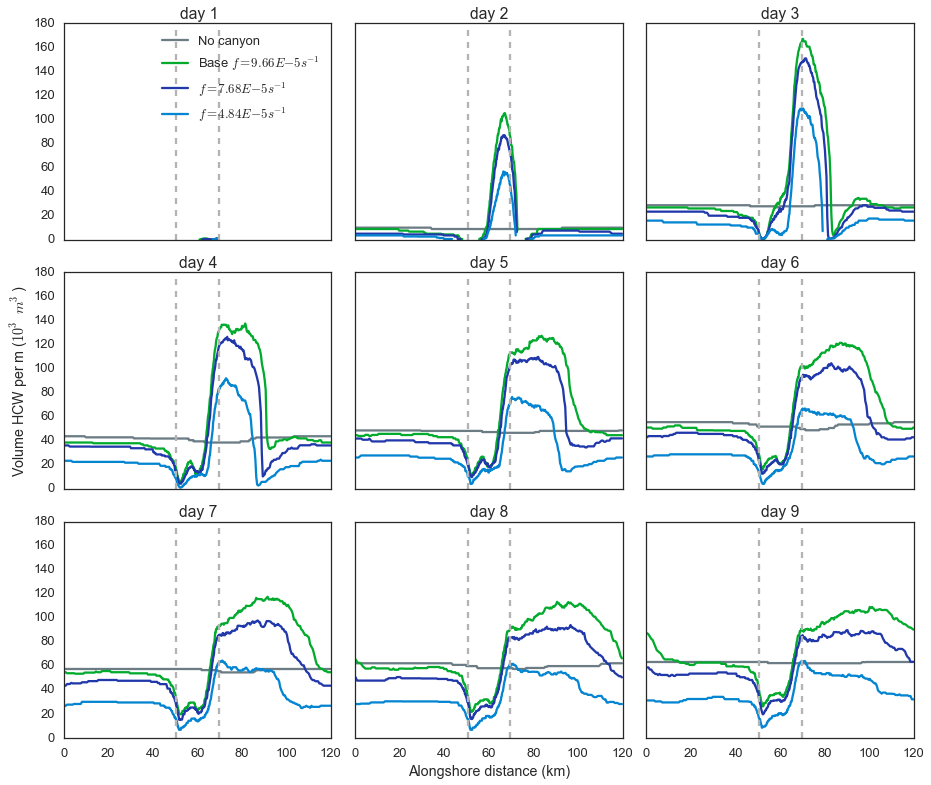

In [36]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (13,11),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    
    ax.plot(xc[1,:]/1000,HCWNoC[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,HCW[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $f=9.66E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW18[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["sapphire"],label='$f=7.68E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,HCW19[ii,:]/(1000*dxf[0,:]),sns.xkcd_rgb["cerulean"],label='$f=4.84E-5s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')
plt.tight_layout()

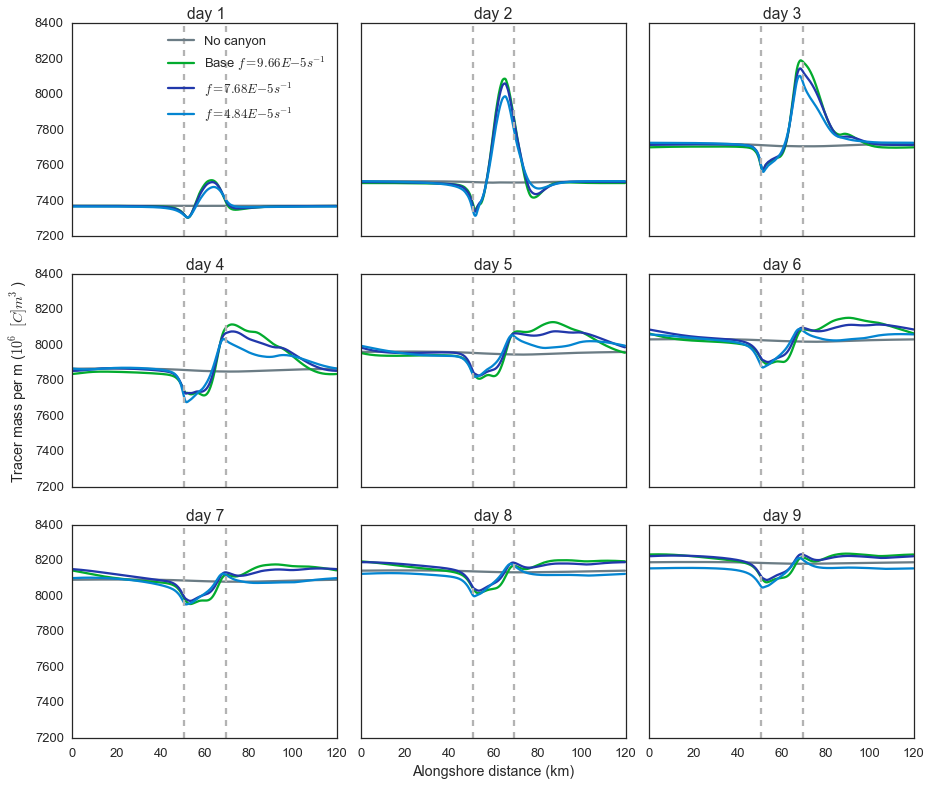

In [37]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (13,11),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    ax.plot(xc[1,:]/1000,TrMassNoC[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["battleship grey"],label='No canyon')
    ax.plot(xc[1,:]/1000,TrMass[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $f=9.66E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass18[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["sapphire"],label='$f=7.68E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,TrMass19[ii,:]/(1000000*dxf[0,:]),sns.xkcd_rgb["cerulean"],label='$f=4.84E-5s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax1.legend(loc=0)
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Tracer mass per m ($10^6$ $[C]m^3$)')

plt.tight_layout()

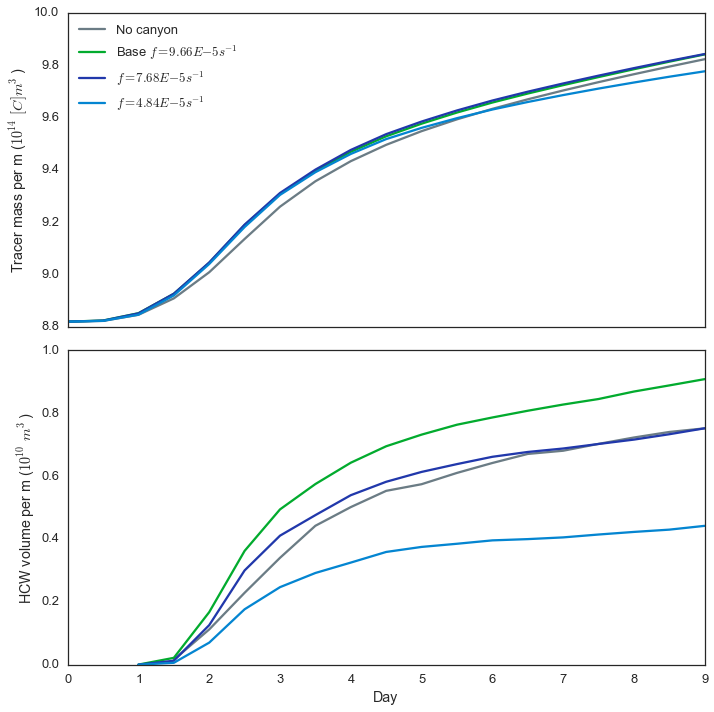

change in HCW from day 5 to day 9 over 4 days ($m^3/s$)
NoC 5.143802e+03
base 5.110141e+03
run18 4.017180e+03
run19 1.940467e+03
change in Tr mass from day 5 to day 9 over 4 days ($m^3/s$)
NoC 7.951074e+07
base 7.654901e+07
run18 7.463972e+07
run19 6.251758e+07


In [38]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)


ax2.plot(tt/2.,np.sum(HCWNoC,axis=1)/1.E10,sns.xkcd_rgb["battleship grey"],label='No canyon')
ax2.plot(tt/2.,np.sum(HCW,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],label='Base $f=9.66E-5s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW18,axis=1)/1.E10,sns.xkcd_rgb["sapphire"],label='$f=7.68E-5s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW19,axis=1)/1.E10,sns.xkcd_rgb["cerulean"],label='f=4.84E-5s^{-1}$')
 
ax1.plot(tt/2.,np.sum(TrMassNoC,axis=1)/1.E14,sns.xkcd_rgb["battleship grey"],label='No canyon')
ax1.plot(tt/2.,np.sum(TrMass,axis=1)/1.E14,sns.xkcd_rgb["kelly green"],label='Base $f=9.66E-5s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass18,axis=1)/1.E14,sns.xkcd_rgb["sapphire"],label='$f=7.68E-5s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass19,axis=1)/1.E14,sns.xkcd_rgb["cerulean"],label='$f=4.84E-5s^{-1}$')
        
    
ax1.legend(loc=0)
ax2.set_xlabel('Day')
ax1.set_ylabel('Tracer mass per m ($10^{14}$ $[C]m^3$)')
ax2.set_ylabel('HCW volume per m ($10^{10}$ $m^3$)')
plt.tight_layout()
plt.show()

print('change in HCW from day 5 to day 9 over 4 days ($m^3/s$)')
print('NoC %e' %((np.sum(HCWNoC,axis=1)[18]-np.sum(HCWNoC,axis=1)[10])/(4*3600.0*24)))
print('base %e' %((np.sum(HCW,axis=1)[18]-np.sum(HCW,axis=1)[10])/(4*3600.0*24)))
print('run18 %e' %((np.sum(HCW18,axis=1)[18]-np.sum(HCW18,axis=1)[10])/(4*3600.0*24)))
print('run19 %e' %((np.sum(HCW19,axis=1)[18]-np.sum(HCW19,axis=1)[10])/(4*3600.0*24)))

print('change in Tr mass from day 5 to day 9 over 4 days ($m^3/s$)')
print('NoC %e' %((np.sum(TrMassNoC,axis=1)[18]-np.sum(TrMassNoC,axis=1)[10])/(4*3600.0*24)))
print('base %e' %((np.sum(TrMass,axis=1)[18]-np.sum(TrMass,axis=1)[10])/(4*3600.0*24)))
print('run18 %e' %((np.sum(TrMass18,axis=1)[18]-np.sum(TrMass18,axis=1)[10])/(4*3600.0*24)))
print('run19 %e' %((np.sum(TrMass19,axis=1)[18]-np.sum(TrMass19,axis=1)[10])/(4*3600.0*24)))

## All variations together

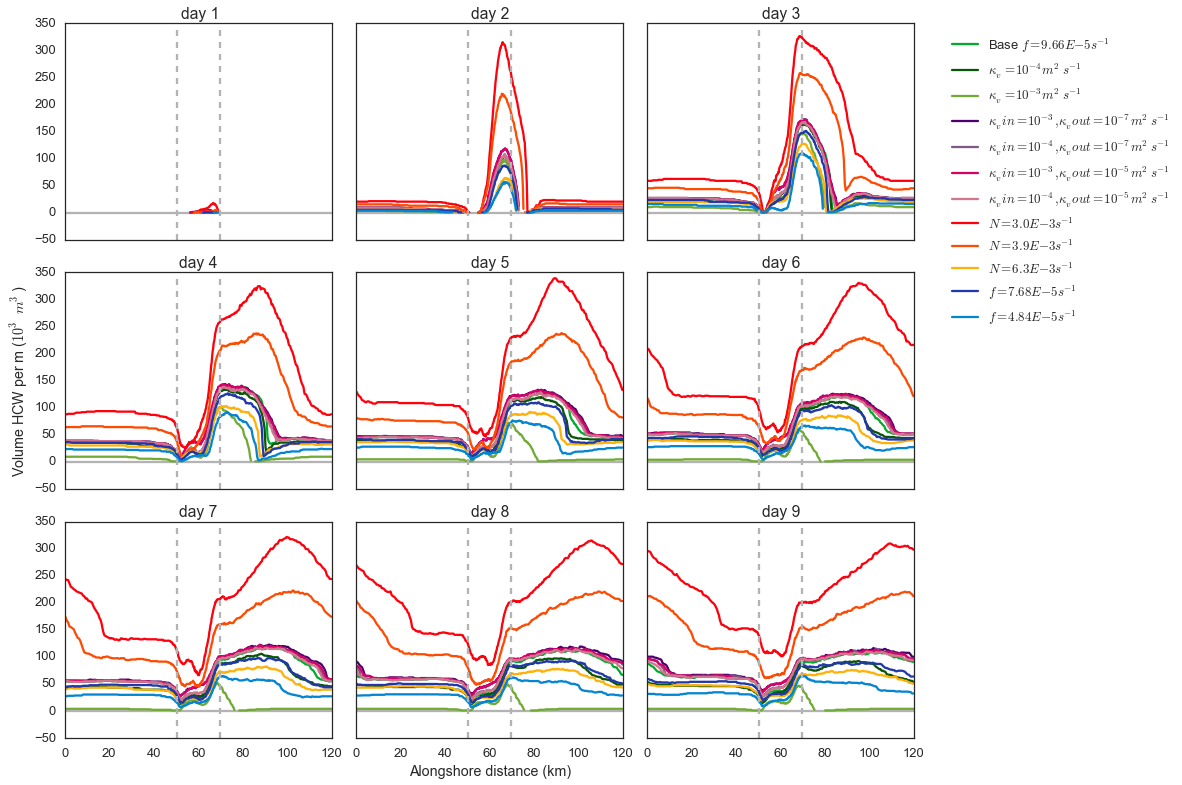

In [39]:
fig33,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (13,11),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    ax.axhline(0,color='0.70',linestyle='-')
    ax.plot(xc[1,:]/1000,(HCW[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $f=9.66E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW11[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["forest"],label='$\kappa_v=10^{-4}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW12[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["leaf"],label='$\kappa_v=10^{-3}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW043D[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["royal purple"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW053D[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["muted purple"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW063D[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["dark hot pink"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW073D[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["muted pink"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW16[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["bright red"],label='$N=3.0E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW14[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["blood orange"],label='$N=3.9E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW15[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["saffron"],label='$N=6.3E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW18[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["sapphire"],label='$f=7.68E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,(HCW19[ii,:])/(1000*dxf[0,:]),sns.xkcd_rgb["cerulean"],label='$f=4.84E-5s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax3.legend(loc ='upper right', bbox_to_anchor=(2,1))
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Volume HCW per m ($10^3$ $m^3$)')
plt.tight_layout()

fig33.savefig('results/figures/HCWperm.eps',format='eps',dpi=1000,bbox_inches='tight')


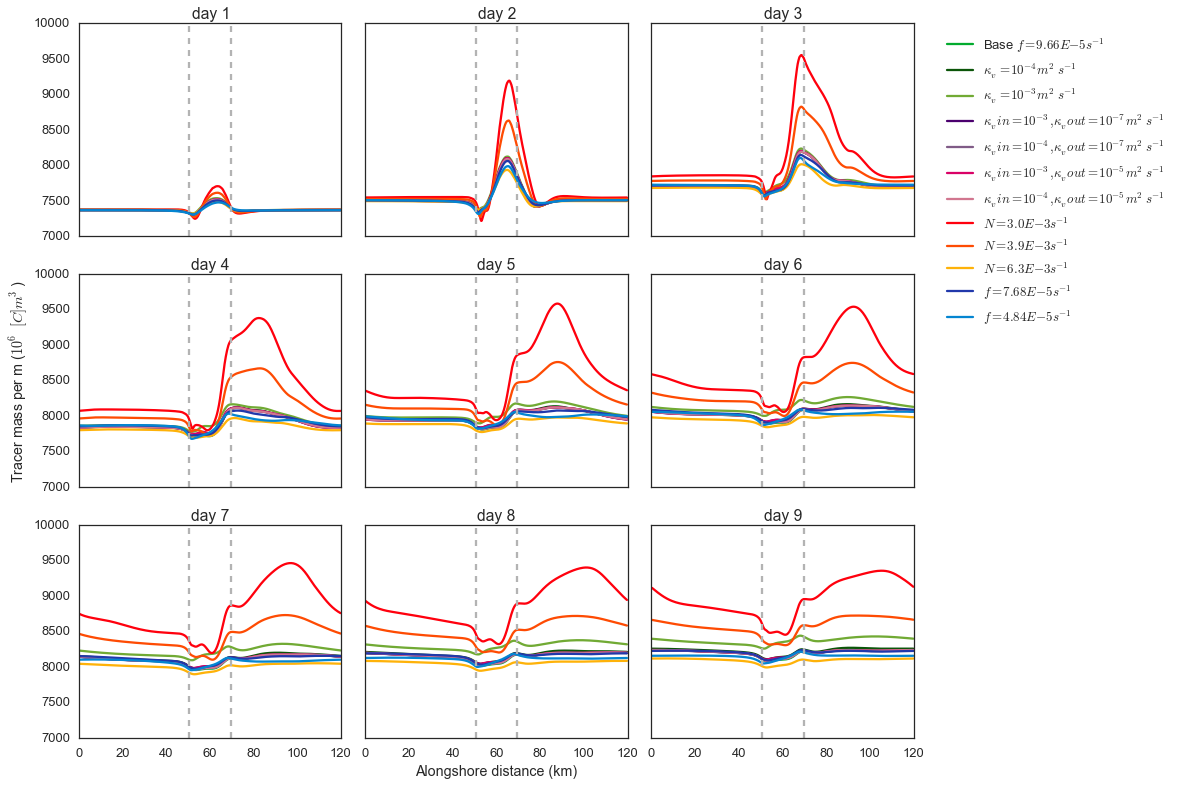

In [40]:
fig33,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize = (13,11),sharex=True, sharey=True)

axlist = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]

times = [2,4,6,8,10,12,14,16,18]
for ii,ax in zip(times,axlist):
    ax.plot(xc[1,:]/1000,(TrMass[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["kelly green"],label='Base $f=9.66E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass11[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["forest"],label='$\kappa_v=10^{-4}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass12[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["leaf"],label='$\kappa_v=10^{-3}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass043D[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["royal purple"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass053D[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["muted purple"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass063D[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["dark hot pink"],label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass073D[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["muted pink"],label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass16[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["bright red"],label='$N=3.0E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass14[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["blood orange"],label='$N=3.9E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass15[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["saffron"],label='$N=6.3E-3s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass18[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["sapphire"],label='$f=7.68E-5s^{-1}$')
    ax.plot(xc[1,:]/1000,(TrMass19[ii,:])/(1000000*dxf[0,:]),sns.xkcd_rgb["cerulean"],label='$f=4.84E-5s^{-1}$')
    
    
    ax.set_title('day %d' %(ii/2))
    plotCanyonPos(ax,xc[1,120]/1000,xc[1,240]/1000)

ax3.legend(loc ='upper right', bbox_to_anchor=(2,1))
ax8.set_xlabel('Alongshore distance (km)')
ax4.set_ylabel('Tracer mass per m ($10^6$ $[C]m^3$)')

plt.tight_layout()
fig33.savefig('results/figures/TrMassperm.eps',format='eps',dpi=1000,bbox_inches='tight')

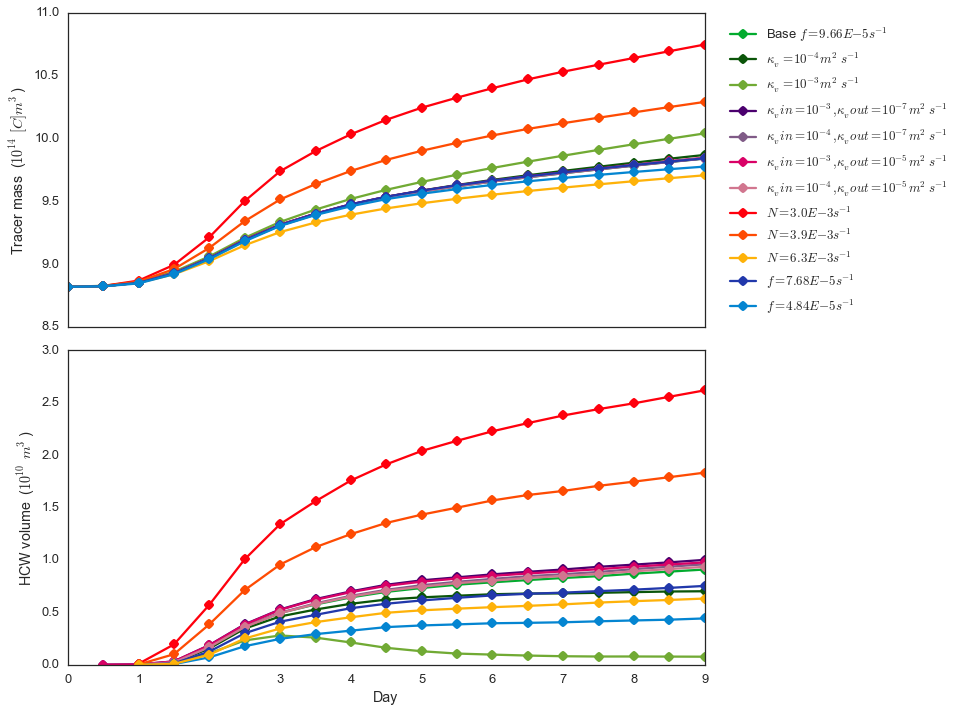

In [41]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize = (10,10),sharex=True)

tt = np.arange(19)


ax2.plot(tt/2.,np.sum(HCW,axis=1)/1.E10,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $f=9.66E-5s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW11,axis=1)/1.E10,sns.xkcd_rgb["forest"],marker = 'o',label='$\kappa_v=10^{-4}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW12,axis=1)/1.E10,sns.xkcd_rgb["leaf"],marker = 'o',label='$\kappa_v=10^{-3}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW043D,axis=1)/1.E10,sns.xkcd_rgb["royal purple"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW053D,axis=1)/1.E10,sns.xkcd_rgb["muted purple"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW063D,axis=1)/1.E10,sns.xkcd_rgb["dark hot pink"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW073D,axis=1)/1.E10,sns.xkcd_rgb["muted pink"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW18,axis=1)/1.E10,sns.xkcd_rgb["sapphire"],marker = 'o',label='$f=7.68E-5s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW19,axis=1)/1.E10,sns.xkcd_rgb["cerulean"],marker = 'o',label='f=4.84E-5s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW16 ,axis=1)/1.E10,sns.xkcd_rgb["bright red"],marker = 'o',label='$N=3.0E-3s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW14 ,axis=1)/1.E10,sns.xkcd_rgb["blood orange"],marker = 'o',label='$N=3.9E-3s^{-1}$')
ax2.plot(tt/2.,np.sum(HCW15 ,axis=1)/1.E10,sns.xkcd_rgb["saffron"],marker = 'o',label='$N=6.3E-3s^{-1}$')

   
ax1.plot(tt/2.,np.sum(TrMass,axis=1)/1.E14,sns.xkcd_rgb["kelly green"],marker = 'o',label='Base $f=9.66E-5s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass11,axis=1)/1.E14,sns.xkcd_rgb["forest"],marker = 'o',label='$\kappa_v=10^{-4}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass12,axis=1)/1.E14,sns.xkcd_rgb["leaf"],marker = 'o',label='$\kappa_v=10^{-3}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass043D,axis=1)/1.E14,sns.xkcd_rgb["royal purple"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass053D,axis=1)/1.E14,sns.xkcd_rgb["muted purple"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass063D,axis=1)/1.E14,sns.xkcd_rgb["dark hot pink"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass073D,axis=1)/1.E14,sns.xkcd_rgb["muted pink"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass16 ,axis=1)/1.E14,sns.xkcd_rgb["bright red"],marker = 'o',label='$N=3.0E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass14 ,axis=1)/1.E14,sns.xkcd_rgb["blood orange"],marker = 'o',label='$N=3.9E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass15 ,axis=1)/1.E14,sns.xkcd_rgb["saffron"],marker = 'o',label='$N=6.3E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass18,axis=1)/1.E14,sns.xkcd_rgb["sapphire"],marker = 'o',label='$f=7.68E-5s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass19,axis=1)/1.E14,sns.xkcd_rgb["cerulean"],marker = 'o',label='$f=4.84E-5s^{-1}$')
        
    
ax1.legend(loc ='upper right', bbox_to_anchor=(1.4,1))
ax2.set_xlabel('Day')
ax1.set_ylabel('Tracer mass  ($10^{14}$ $[C]m^3$)')
ax2.set_ylabel('HCW volume  ($10^{10}$ $m^3$)')
plt.tight_layout()
plt.show()

fig.savefig('results/figures/TrandHCWOverTime.eps',format='eps',dpi=1000,bbox_inches='tight')

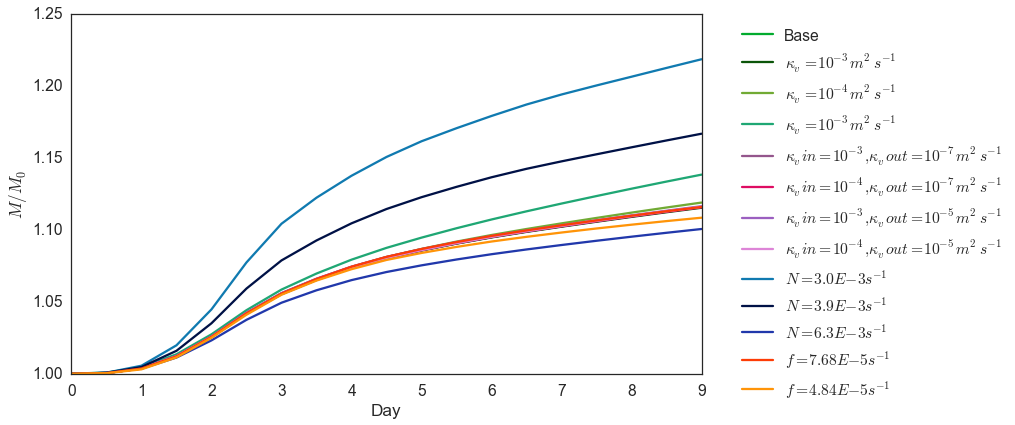

In [42]:
sns.set_context('talk', font_scale=1.2)

fig,(ax1) = plt.subplots(1,1, figsize = (10,6),sharex=True)

tt = np.arange(19)

ax1.plot(tt/2.,np.sum(TrMass,axis=1)/np.sum(TrMass,axis=1)[0],sns.xkcd_rgb["kelly green"], label='Base')
ax1.plot(tt/2.,np.sum(TrMass17,axis=1)/np.sum(TrMass17,axis=1)[0],sns.xkcd_rgb["forest"], label='$\kappa_v=10^{-3}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass11,axis=1)/np.sum(TrMass11,axis=1)[0],sns.xkcd_rgb["leaf"], label='$\kappa_v=10^{-4}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass12,axis=1)/np.sum(TrMass12,axis=1)[0],sns.xkcd_rgb["jade"], label='$\kappa_v=10^{-3}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass043D,axis=1)/np.sum(TrMass043D,axis=1)[0],sns.xkcd_rgb["purplish"], label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass053D,axis=1)/np.sum(TrMass053D,axis=1)[0],sns.xkcd_rgb["cerise"], label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass063D,axis=1)/np.sum(TrMass063D,axis=1)[0],sns.xkcd_rgb["amethyst"], label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass073D,axis=1)/np.sum(TrMass073D,axis=1)[0],sns.xkcd_rgb["lavender pink"], label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass16 ,axis=1)/np.sum(TrMass16,axis=1)[0],sns.xkcd_rgb["nice blue"], label='$N=3.0E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass14 ,axis=1)/np.sum(TrMass14,axis=1)[0],sns.xkcd_rgb["navy blue"], label='$N=3.9E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass15 ,axis=1)/np.sum(TrMass15,axis=1)[0],sns.xkcd_rgb["sapphire"], label='$N=6.3E-3s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass18,axis=1)/np.sum(TrMass18,axis=1)[0],sns.xkcd_rgb["red orange"], label='$f=7.68E-5s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass19,axis=1)/np.sum(TrMass19,axis=1)[0],sns.xkcd_rgb["tangerine"], label='$f=4.84E-5s^{-1}$')
        
    
ax1.legend(loc ='upper right', bbox_to_anchor=(1.5,1))
ax1.set_xlabel('Day')
ax1.set_ylabel('$M / M_0$')
plt.tight_layout()
plt.show()

fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/TrMassOthers.pdf',format='pdf',dpi=1000,bbox_inches='tight')

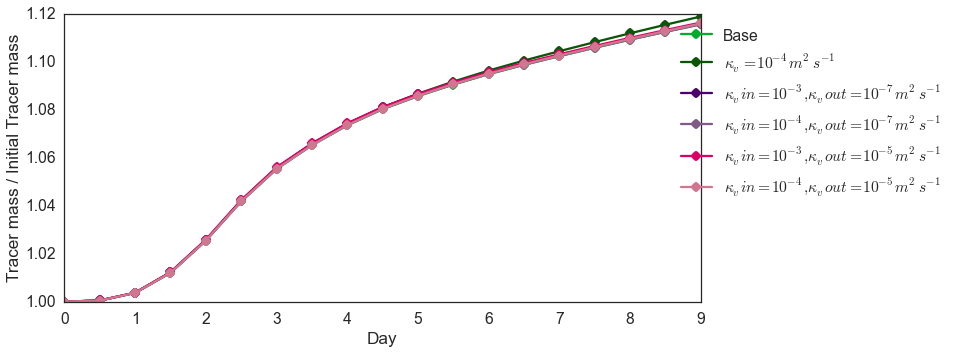

In [43]:
fig,(ax1) = plt.subplots(1,1, figsize = (10,5),sharex=True)

tt = np.arange(19)

ax1.plot(tt/2.,np.sum(TrMass,axis=1)/np.sum(TrMass,axis=1)[0],sns.xkcd_rgb["kelly green"],marker = 'o',label='Base')
ax1.plot(tt/2.,np.sum(TrMass11,axis=1)/np.sum(TrMass11,axis=1)[0],sns.xkcd_rgb["forest"],marker = 'o',label='$\kappa_v=10^{-4}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass043D,axis=1)/np.sum(TrMass043D,axis=1)[0],sns.xkcd_rgb["royal purple"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass053D,axis=1)/np.sum(TrMass053D,axis=1)[0],sns.xkcd_rgb["muted purple"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass063D,axis=1)/np.sum(TrMass063D,axis=1)[0],sns.xkcd_rgb["dark hot pink"],marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
ax1.plot(tt/2.,np.sum(TrMass073D,axis=1)/np.sum(TrMass073D,axis=1)[0],sns.xkcd_rgb["muted pink"],marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
            
ax1.legend(loc ='upper right', bbox_to_anchor=(1.4,1))
ax1.set_xlabel('Day')
ax1.set_ylabel('Tracer mass / Initial Tracer mass')
plt.tight_layout()
plt.show()

#fig.savefig('results/figures/TrandHCWOverTime.eps',format='eps',dpi=1000,bbox_inches='tight')

In [48]:
bottomConcCanyonBarDelta = np.array([-0.0464013451831,
                                    0.0695106812758,
                                    0.0722178390472,
                                    0.0907691657503,
                                    0.060702952976,
                                    0.111319762718])

labelsListCanyonBar = ['Oxygen',
                       'Nitrate',
                       'Silicate',
                       'Phosphate',
                       'Nitrous_Acid',
                       'Methane']


In [49]:
labelsListCanyon = ['kiso = 10',
                    'Base', 
                    'kiso = 0.1',
                    'kv=1E-4',
                    'kv=1E-3',
                    'N=3.9E-3',
                    'N=6.3E-3',
                    'N=3.0E-3',
                    'kv=1E-7',
                    'f=7.68E-5',
                    'f=4.84E-5',
                    'kv=3.8E-5',
                    'kv=2.8E-5',
                    'kv_can=1E-7, kv_out=1E-3',
                    'kv_can=1E-7, kv_out=1E-4',
                    'kv_can=1E-5, kv_out=1E-3',
                    'kv_can=1E-5, kv_out=1E-4',
]



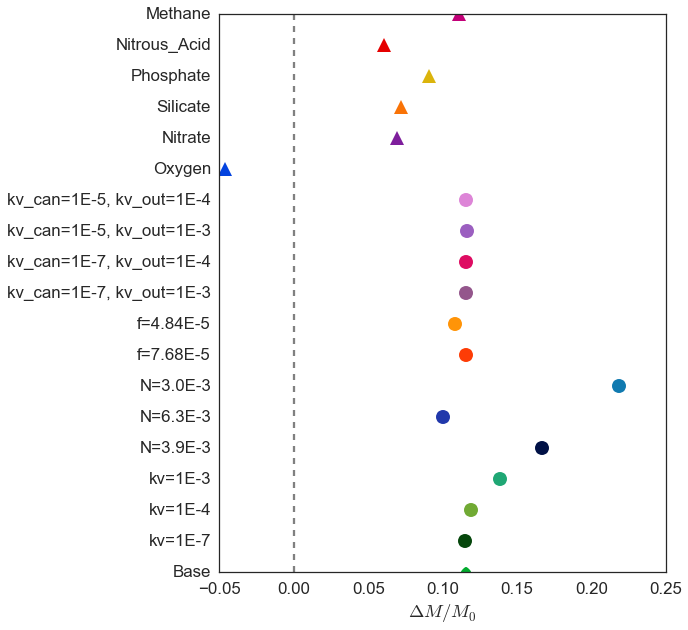

In [52]:
colors_all = ["kelly green","forest green","leaf","jade","navy blue","sapphire","nice blue",
              "red orange","tangerine","purplish","cerise","amethyst","lavender pink","blue",
              "purple","orange","gold","red","magenta"]

color_pal_all = sns.xkcd_palette(colors_all)

sns.set_palette(color_pal_all)

sns.set_context('talk', font_scale=1.3)

fig,((ax1)) = plt.subplots(1, 1, figsize=(8, 10))

ax1.plot((np.sum(TrMass,axis=1)[18]-np.sum(TrMass,axis=1)[0])/(np.sum(TrMass,axis=1)[0]),0, 'o',label='Base')
ax1.plot((np.sum(TrMass17,axis=1)[18]-np.sum(TrMass17,axis=1)[0])/(np.sum(TrMass17,axis=1)[0]),1,marker = 'o',markersize=14)
ax1.plot((np.sum(TrMass11,axis=1)[18]-np.sum(TrMass11,axis=1)[0])/(np.sum(TrMass11,axis=1)[0]),2,marker = 'o',markersize=14)
ax1.plot((np.sum(TrMass12,axis=1)[18]-np.sum(TrMass12,axis=1)[0])/(np.sum(TrMass12,axis=1)[0]),3,marker = 'o',markersize=14)
ax1.plot((np.sum(TrMass14,axis=1)[18]-np.sum(TrMass14,axis=1)[0])/(np.sum(TrMass14,axis=1)[0]),4,marker = 'o',markersize=14)
ax1.plot((np.sum(TrMass15,axis=1)[18]-np.sum(TrMass15,axis=1)[0])/(np.sum(TrMass15,axis=1)[0]),5,marker = 'o',markersize=14)
ax1.plot((np.sum(TrMass16,axis=1)[18]-np.sum(TrMass16,axis=1)[0])/(np.sum(TrMass16,axis=1)[0]),6,marker = 'o',markersize=14)
ax1.plot((np.sum(TrMass18,axis=1)[18]-np.sum(TrMass18,axis=1)[0])/(np.sum(TrMass18,axis=1)[0]),7,marker = 'o',markersize=14)
ax1.plot((np.sum(TrMass19,axis=1)[18]-np.sum(TrMass19,axis=1)[0])/(np.sum(TrMass19,axis=1)[0]),8,marker = 'o',markersize=14)
ax1.plot((np.sum(TrMass043D,axis=1)[18]-np.sum(TrMass043D,axis=1)[0])/(np.sum(TrMass043D,axis=1)[0]),9,marker = 'o',markersize=14)
ax1.plot((np.sum(TrMass053D,axis=1)[18]-np.sum(TrMass053D,axis=1)[0])/(np.sum(TrMass053D,axis=1)[0]),10,marker = 'o',markersize=14)
ax1.plot((np.sum(TrMass063D,axis=1)[18]-np.sum(TrMass063D,axis=1)[0])/(np.sum(TrMass063D,axis=1)[0]),11,marker = 'o',markersize=14)
ax1.plot((np.sum(TrMass073D,axis=1)[18]-np.sum(TrMass073D,axis=1)[0])/(np.sum(TrMass073D,axis=1)[0]),12,marker = 'o',markersize=14)
 
jj = 13
for ii in range(len(bottomConcCanyonBarDelta)):
    ax1.plot(bottomConcCanyonBarDelta[ii],jj,marker='^',markersize=14)
    jj = jj+1

    
my_yticks = [labelsListCanyon[1],
             labelsListCanyon[8],
             labelsListCanyon[3],
             labelsListCanyon[4],
             labelsListCanyon[5],
             labelsListCanyon[6],
             labelsListCanyon[7],
             labelsListCanyon[9],
             labelsListCanyon[10],
             labelsListCanyon[13],
             labelsListCanyon[14],
             labelsListCanyon[15],
             labelsListCanyon[16],
             labelsListCanyonBar[0],
             labelsListCanyonBar[1],
             labelsListCanyonBar[2],
             labelsListCanyonBar[3],
             labelsListCanyonBar[4],
             labelsListCanyonBar[5]]

plt.yticks(range(19), my_yticks, rotation=0)
ax1.set_xlabel('$\Delta M /M_0  $')
#ax1.legend(loc ='upper right', bbox_to_anchor=(1.40,1))    
ax1.axvline(0,linestyle = '--', color = '0.5')
sns.set_context('talk', font_scale=1.0)






#fig.savefig('/home/kramosmu/Documents/CMOS2016/Figures/TrMassFluxAllUpwelling.pdf', format='pdf', dpi=1000, bbox_inches='tight')


NameError: name 'bottomConcCanyonBarDeltaTimeDep' is not defined

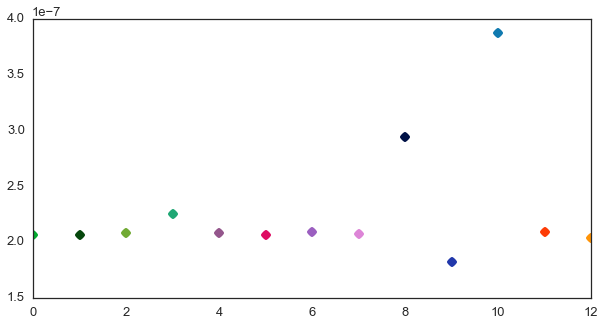

In [47]:
fig,((ax1)) = plt.subplots(1, 1, figsize=(10, 5))



ax1.plot(0,(np.sum(TrMass,axis=1)[9]-np.sum(TrMass,axis=1)[0])/(np.sum(TrMass,axis=1)[0]*12*9*3600.0),marker = 'o',label='Base')
ax1.plot(1,(np.sum(TrMass17,axis=1)[9]-np.sum(TrMass17,axis=1)[0])/(np.sum(TrMass17,axis=1)[0]*12*9*3600.0),marker = 'o',label='$\kappa_v=10^{-7}m^2s^{-1}$')
ax1.plot(2,(np.sum(TrMass11,axis=1)[9]-np.sum(TrMass11,axis=1)[0])/(np.sum(TrMass11,axis=1)[0]*12*9*3600.0),marker = 'o',label='$\kappa_v=10^{-4}m^2s^{-1}$')
ax1.plot(3,(np.sum(TrMass12,axis=1)[9]-np.sum(TrMass12,axis=1)[0])/(np.sum(TrMass12,axis=1)[0]*12*9*3600.0),marker = 'o',label='$\kappa_v=10^{-3}m^2s^{-1}$')
ax1.plot(8,(np.sum(TrMass14,axis=1)[9]-np.sum(TrMass14,axis=1)[0])/(np.sum(TrMass14,axis=1)[0]*12*9*3600.0),marker = 'o',label='$N=3.0E-3s^{-1}$')
ax1.plot(9,(np.sum(TrMass15,axis=1)[9]-np.sum(TrMass15,axis=1)[0])/(np.sum(TrMass15,axis=1)[0]*12*9*3600.0),marker = 'o',label='$N=3.9E-3s^{-1}$')
ax1.plot(10,(np.sum(TrMass16,axis=1)[9]-np.sum(TrMass16,axis=1)[0])/(np.sum(TrMass16,axis=1)[0]*12*9*3600.0),marker = 'o',label='$N=6.3E-3s^{-1}$')
ax1.plot(11,(np.sum(TrMass18,axis=1)[9]-np.sum(TrMass18,axis=1)[0])/(np.sum(TrMass18,axis=1)[0]*12*9*3600.0),marker = 'o',label='$f=7.68E-5s^{-1}$')
ax1.plot(12,(np.sum(TrMass19,axis=1)[9]-np.sum(TrMass19,axis=1)[0])/(np.sum(TrMass19,axis=1)[0]*12*9*3600.0),marker = 'o',label='$f=4.84E-5s^{-1}$')
ax1.plot(4,(np.sum(TrMass043D,axis=1)[9]-np.sum(TrMass043D,axis=1)[0])/(np.sum(TrMass043D,axis=1)[0]*12*9*3600.0),marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-7}m^2s^{-1}$')
ax1.plot(5,(np.sum(TrMass053D,axis=1)[9]-np.sum(TrMass053D,axis=1)[0])/(np.sum(TrMass053D,axis=1)[0]*12*9*3600.0),marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-7}m^2s^{-1}$')
ax1.plot(6,(np.sum(TrMass063D,axis=1)[9]-np.sum(TrMass063D,axis=1)[0])/(np.sum(TrMass063D,axis=1)[0]*12*9*3600.0),marker = 'o',label='$\kappa_vin=10^{-3},\kappa_vout=10^{-5}m^2s^{-1}$')
ax1.plot(7,(np.sum(TrMass073D,axis=1)[9]-np.sum(TrMass073D,axis=1)[0])/(np.sum(TrMass073D,axis=1)[0]*12*9*3600.0),marker = 'o',label='$\kappa_vin=10^{-4},\kappa_vout=10^{-5}m^2s^{-1}$')
 
jj = 13
for ii in range(6):
    ax1.plot(jj,(bottomConcCanyonBarDeltaTimeDep[ii]/(12*9*3600.0)),'o',label=labelsListCanyonBar[ii])
    jj = jj + 1
    ax1.set_aspect('auto')
    ax1.set_title('Tracer mass time-dependent phase ' )
    ax1.set_ylabel('$\Delta C/\Delta t$')
    

ax1.legend(loc ='upper right', bbox_to_anchor=(1.45,1))    
ax1.axhline(0,linestyle = '--', color = '0.5')
plt.tight_layout

plt.show()
ax1.set_xlabel('Days')
#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')


### Process the rest of the runs and save dataframe


In [ ]:
# Process the rest of the runs to save pandas dataframe
Ptracers02 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run02/ptracersGlob.nc' 
Ptracers04 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run04/ptracersGlob.nc' 
Ptracers20 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run20/ptracersGlob.nc' 

Tra = rout.getField(Ptracers02, 'Tr1')
Trb = rout.getField(Ptracers04, 'Tr1')
Trc = rout.getField(Ptracers20, 'Tr2')

HCW02,TrMass02 = HCW_Tracer_AlongShelf(Tra,mask_NoC,30,rA,hFacC,drF,227,30,180,50)
HCW04,TrMass04 = HCW_Tracer_AlongShelf(Trb,mask_NoC,30,rA,hFacC,drF,227,30,180,50)
HCW20,TrMass20 = HCW_Tracer_AlongShelf(Trc,mask_NoC,30,rA,hFacC,drF,227,30,180,50)


In [ ]:
runs = ['02','03','04','07','11','12','14','15','16','17','18','19','20','043D','053D','063D','073D']

DHCW_data = np.zeros(len(runs))
DTrMass_data = np.zeros(len(runs))
# HCW
DHCW_data[0] = ((np.sum(HCW02,axis=1)[18]-np.sum(HCW02,axis=1)[10])/(4*3600.0*24))
DHCW_data[1] = ((np.sum(HCW,axis=1)[18]-np.sum(HCW,axis=1)[10])/(4*3600.0*24))
DHCW_data[2] = ((np.sum(HCW04,axis=1)[18]-np.sum(HCW04,axis=1)[10])/(4*3600.0*24))
DHCW_data[3] = ((np.sum(HCWNoC,axis=1)[18]-np.sum(HCWNoC,axis=1)[10])/(4*3600.0*24))
DHCW_data[4] = ((np.sum(HCW11,axis=1)[18]-np.sum(HCW11,axis=1)[10])/(4*3600.0*24))
DHCW_data[5] = ((np.sum(HCW12,axis=1)[18]-np.sum(HCW12,axis=1)[10])/(4*3600.0*24))
DHCW_data[6] = ((np.sum(HCW14,axis=1)[18]-np.sum(HCW14,axis=1)[10])/(4*3600.0*24))
DHCW_data[7] = ((np.sum(HCW15,axis=1)[18]-np.sum(HCW15,axis=1)[10])/(4*3600.0*24))
DHCW_data[8] = ((np.sum(HCW16,axis=1)[18]-np.sum(HCW16,axis=1)[10])/(4*3600.0*24))
DHCW_data[9] = ((np.sum(HCW17,axis=1)[18]-np.sum(HCW17,axis=1)[10])/(4*3600.0*24))
DHCW_data[10] = ((np.sum(HCW18,axis=1)[18]-np.sum(HCW18,axis=1)[10])/(4*3600.0*24))
DHCW_data[11] = ((np.sum(HCW19,axis=1)[18]-np.sum(HCW19,axis=1)[10])/(4*3600.0*24))
DHCW_data[12] = ((np.sum(HCW20,axis=1)[18]-np.sum(HCW20,axis=1)[10])/(4*3600.0*24))

DHCW_data[13] = ((np.sum(HCW043D,axis=1)[18]-np.sum(HCW043D,axis=1)[10])/(4*3600.0*24))
DHCW_data[14] = ((np.sum(HCW053D,axis=1)[18]-np.sum(HCW053D,axis=1)[10])/(4*3600.0*24))
DHCW_data[15] = ((np.sum(HCW063D,axis=1)[18]-np.sum(HCW063D,axis=1)[10])/(4*3600.0*24))
DHCW_data[16] = ((np.sum(HCW073D,axis=1)[18]-np.sum(HCW073D,axis=1)[10])/(4*3600.0*24))

 

#Tracer mass
DTrMass_data[0] = ((np.sum(TrMass02,axis=1)[18]-np.sum(TrMass02,axis=1)[10])/(4*3600.0*24))
DTrMass_data[1] =((np.sum(TrMass,axis=1)[18]-np.sum(TrMass,axis=1)[10])/(4*3600.0*24))
DTrMass_data[2] =((np.sum(TrMass04,axis=1)[18]-np.sum(TrMass04,axis=1)[10])/(4*3600.0*24))
DTrMass_data[3] =((np.sum(TrMassNoC,axis=1)[18]-np.sum(TrMassNoC,axis=1)[10])/(4*3600.0*24))
DTrMass_data[4] =((np.sum(TrMass11,axis=1)[18]-np.sum(TrMass11,axis=1)[10])/(4*3600.0*24))
DTrMass_data[5] =((np.sum(TrMass12,axis=1)[18]-np.sum(TrMass12,axis=1)[10])/(4*3600.0*24))
DTrMass_data[6] =((np.sum(TrMass14,axis=1)[18]-np.sum(TrMass14,axis=1)[10])/(4*3600.0*24))
DTrMass_data[7] =((np.sum(TrMass15,axis=1)[18]-np.sum(TrMass15,axis=1)[10])/(4*3600.0*24))
DTrMass_data[8] =((np.sum(TrMass16,axis=1)[18]-np.sum(TrMass16,axis=1)[10])/(4*3600.0*24))
DTrMass_data[9] =((np.sum(TrMass17,axis=1)[18]-np.sum(TrMass17,axis=1)[10])/(4*3600.0*24))
DTrMass_data[10] =((np.sum(TrMass18,axis=1)[18]-np.sum(TrMass18,axis=1)[10])/(4*3600.0*24))
DTrMass_data[11] =((np.sum(TrMass19,axis=1)[18]-np.sum(TrMass19,axis=1)[10])/(4*3600.0*24))
DTrMass_data[12] =((np.sum(TrMass20,axis=1)[18]-np.sum(TrMass20,axis=1)[10])/(4*3600.0*24))

 
DTrMass_data[13] =((np.sum(TrMass043D,axis=1)[18]-np.sum(TrMass043D,axis=1)[10])/(4*3600.0*24))
DTrMass_data[14] =((np.sum(TrMass053D,axis=1)[18]-np.sum(TrMass053D,axis=1)[10])/(4*3600.0*24))
DTrMass_data[15] =((np.sum(TrMass063D,axis=1)[18]-np.sum(TrMass063D,axis=1)[10])/(4*3600.0*24))
DTrMass_data[16] =((np.sum(TrMass073D,axis=1)[18]-np.sum(TrMass073D,axis=1)[10])/(4*3600.0*24))

In [ ]:
# save data frame
raw_data = {'RunNum':runs,'deltaHCW': DHCW_data,'deltaTrMass': DTrMass_data}

df = pd.DataFrame(raw_data, columns = ['eRunNum','deltaHCW','deltaTrMass'])

filename = ('results/metricsDataFrames/DeltaTrOnShelf.csv' )
df.to_csv(filename)